In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller 
import datetime
from sklearn.linear_model import LinearRegression

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Analisis Preliminar Datos para ML

In [4]:
taxis = pd.read_parquet('../ETL/taxis_def.parquet')

In [6]:
taxis

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,trip_type,pickup_datetime,dropoff_datetime,duration
0,1,0.80,1.0,N,163,230,3,6.50,3.5,0.5,...,0.0,1.0,11.50,2.5,0.0,yellow,1.0,2023-09-01 00:15:37,2023-09-01 00:20:21,4.733333
1,2,2.34,1.0,N,236,233,2,14.20,1.0,0.5,...,0.0,1.0,21.20,2.5,0.0,yellow,1.0,2023-09-01 00:18:40,2023-09-01 00:30:28,11.800000
2,1,1.62,1.0,N,162,236,2,8.60,1.0,0.5,...,0.0,1.0,15.60,2.5,0.0,yellow,1.0,2023-09-01 00:35:01,2023-09-01 00:39:04,4.050000
3,1,0.74,1.0,N,141,229,2,5.10,1.0,0.5,...,0.0,1.0,11.10,2.5,0.0,yellow,1.0,2023-09-01 00:45:45,2023-09-01 00:47:37,1.866667
7,1,3.90,1.0,N,140,7,2,20.50,3.5,0.5,...,0.0,1.0,31.85,2.5,0.0,yellow,1.0,2023-09-01 00:01:04,2023-09-01 00:18:36,17.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40176764,1,5.25,1.0,N,116,140,2,32.36,0.0,0.5,...,0.0,1.0,43.93,2.5,0.0,green,1.0,2024-08-31 19:11:32,2024-08-31 19:29:47,18.250000
40176767,1,1.78,1.0,N,129,7,2,17.86,0.0,0.0,...,0.0,1.0,21.86,2.5,0.0,green,1.0,2024-08-31 21:39:00,2024-08-31 21:56:00,17.000000
40176768,1,3.27,1.0,N,255,65,2,23.95,0.0,0.0,...,0.0,1.0,29.84,2.5,0.0,green,1.0,2024-08-31 22:59:00,2024-08-31 23:19:00,20.000000
40176769,1,2.50,1.0,N,244,41,2,20.09,0.0,0.0,...,0.0,1.0,21.09,2.5,0.0,green,1.0,2024-08-31 22:26:00,2024-08-31 22:42:00,16.000000


# Series de Tiempo

In [7]:
taxis.drop(columns=['store_and_fwd_flag','extra','fare_amount','mta_tax','tip_amount',
                    'tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','RatecodeID'], inplace=True)

In [8]:
taxis['type'] = taxis['type'].apply(lambda x : 1 if x=='yellow' else 2)

In [9]:
taxis['n_trips'] = 1

In [10]:
taxis

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,type,trip_type,pickup_datetime,dropoff_datetime,duration,n_trips
0,1,0.80,163,230,3,11.50,1,1.0,2023-09-01 00:15:37,2023-09-01 00:20:21,4.733333,1
1,2,2.34,236,233,2,21.20,1,1.0,2023-09-01 00:18:40,2023-09-01 00:30:28,11.800000,1
2,1,1.62,162,236,2,15.60,1,1.0,2023-09-01 00:35:01,2023-09-01 00:39:04,4.050000,1
3,1,0.74,141,229,2,11.10,1,1.0,2023-09-01 00:45:45,2023-09-01 00:47:37,1.866667,1
7,1,3.90,140,7,2,31.85,1,1.0,2023-09-01 00:01:04,2023-09-01 00:18:36,17.533333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40176764,1,5.25,116,140,2,43.93,2,1.0,2024-08-31 19:11:32,2024-08-31 19:29:47,18.250000,1
40176767,1,1.78,129,7,2,21.86,2,1.0,2024-08-31 21:39:00,2024-08-31 21:56:00,17.000000,1
40176768,1,3.27,255,65,2,29.84,2,1.0,2024-08-31 22:59:00,2024-08-31 23:19:00,20.000000,1
40176769,1,2.50,244,41,2,21.09,2,1.0,2024-08-31 22:26:00,2024-08-31 22:42:00,16.000000,1


In [11]:
taxis['PULocationID'] = taxis['PULocationID'].astype('category')
taxis['DOLocationID'] = taxis['DOLocationID'].astype('category')
taxis['type'] = taxis['type'].astype('category')
taxis['trip_type'] = taxis['trip_type'].astype('category')
taxis['payment_type'] = taxis['payment_type'].astype('category')

In [12]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33597925 entries, 0 to 40176770
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   passenger_count   int64         
 1   trip_distance     float64       
 2   PULocationID      category      
 3   DOLocationID      category      
 4   payment_type      category      
 5   total_amount      float64       
 6   type              category      
 7   trip_type         category      
 8   pickup_datetime   datetime64[us]
 9   dropoff_datetime  datetime64[us]
 10  duration          float64       
 11  n_trips           int64         
dtypes: category(5), datetime64[us](2), float64(3), int64(2)
memory usage: 2.2 GB


In [13]:
taxis_s = taxis.drop(columns=['PULocationID','DOLocationID','dropoff_datetime','payment_type','type','trip_type'])

In [ ]:
diario = taxis_s.resample('D', on = 'pickup_datetime').sum()

In [ ]:
diario

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-08-25,1,1.80,16.32,9.383333,1
2023-08-26,4,18.63,114.42,55.433333,4
2023-08-27,0,0.00,0.00,0.000000,0
2023-08-28,2,0.01,22.80,0.066667,2
2023-08-29,1,4.04,30.24,10.416667,1
...,...,...,...,...,...
2024-09-06,0,0.00,0.00,0.000000,0
2024-09-07,0,0.00,0.00,0.000000,0
2024-09-08,0,0.00,0.00,0.000000,0


In [ ]:
semanal = taxis_s.resample('W', on = 'pickup_datetime').sum()

In [ ]:
semanal.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-08-27,5,20.43,130.74,6.481667e+01,5
2023-09-03,292416,404505.92,4131417.40,2.397677e+06,204372
2023-09-10,846917,1183730.94,13663815.06,8.479715e+06,643151
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,306965


In [14]:
mensual = taxis_s.resample('M', on = 'pickup_datetime').sum()

In [15]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-08-31,39,67.19,571.24,3.238167e+02,24
2023-09-30,3103349,4354006.61,50978081.73,3.171371e+07,2383407
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2878259
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477
2024-02-29,3341622,4790656.33,53447385.19,3.177544e+07,2618823
2024-03-31,3916080,5804068.48,63395507.19,3.847457e+07,3086307
2024-04-30,3809875,5778995.02,62516945.41,3.832527e+07,3012148


Se borro agosto del 2023 y septiembre del 2024

In [21]:
diario.drop(diario[(diario.index.year==2023)&(diario.index.month==8)].index,inplace=True)
diario.drop(diario[(diario.index.year==2024)&(diario.index.month==9)].index,inplace=True)

In [22]:
semanal.drop(semanal[(semanal.index.year==2023)&(semanal.index.month==8)].index,inplace=True)
semanal.drop(semanal[(semanal.index.year==2024)&(semanal.index.month==9)].index,inplace=True)

In [23]:
mensual.drop(mensual[(mensual.index.year==2023)&(mensual.index.month==8)].index,inplace=True)
mensual.drop(mensual[(mensual.index.year==2024)&(mensual.index.month==9)].index,inplace=True)

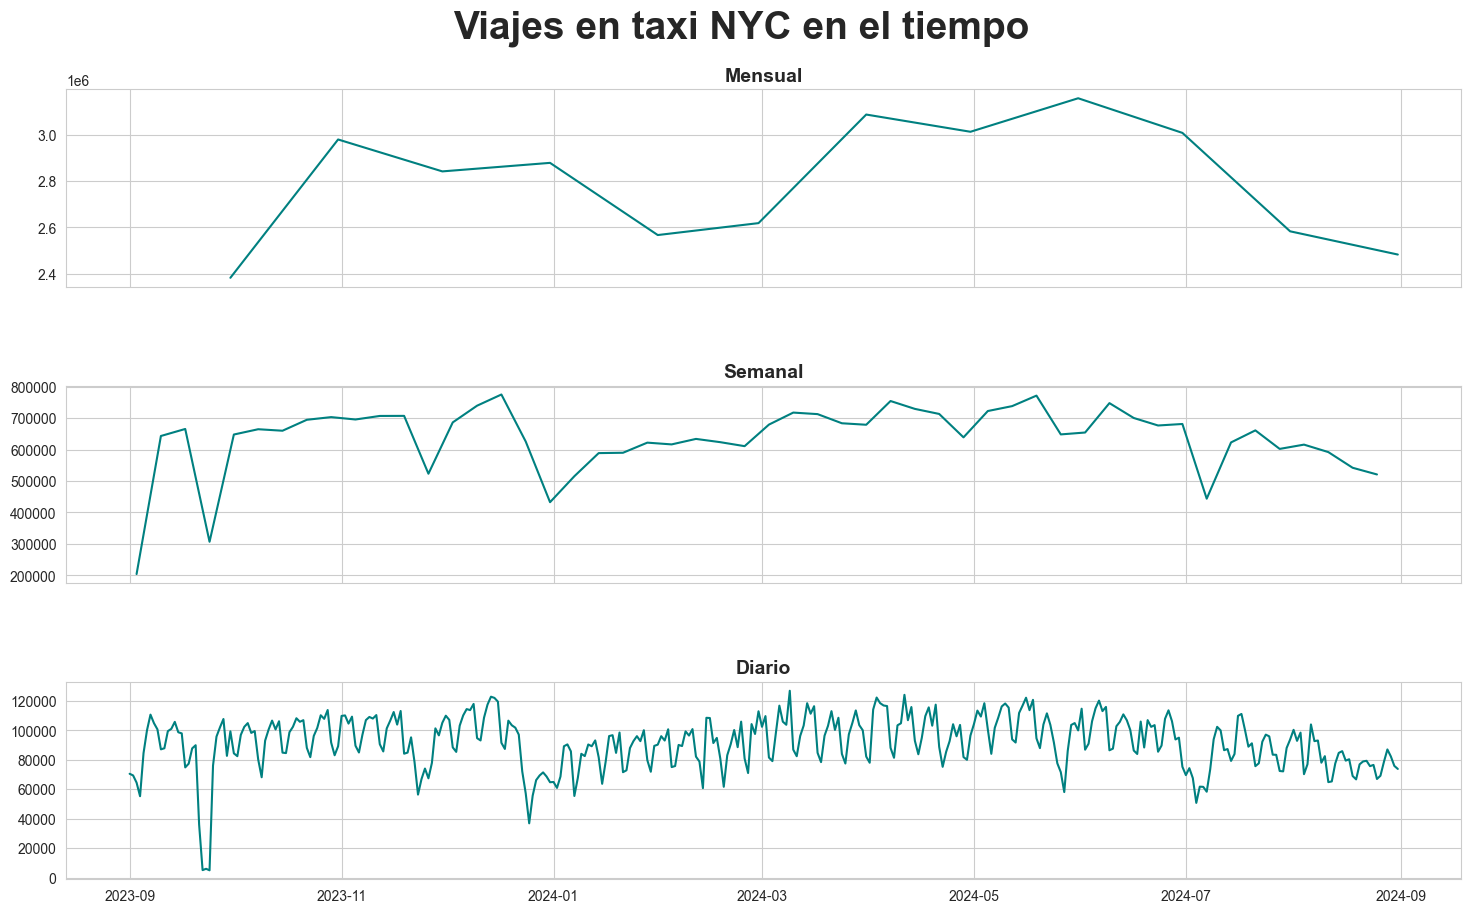

In [28]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (18,10), gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)
fig.suptitle("Viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.5)

ax[0].plot(mensual.index, mensual.n_trips, color='teal')
ax[0].set_title('Mensual',fontsize=14, fontweight='bold')

ax[1].plot(semanal.index, semanal.n_trips, color='teal')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')

ax[2].plot(diario.index, diario.n_trips, color='teal')
ax[2].set_title('Diario',fontsize=14, fontweight='bold')



plt.show()

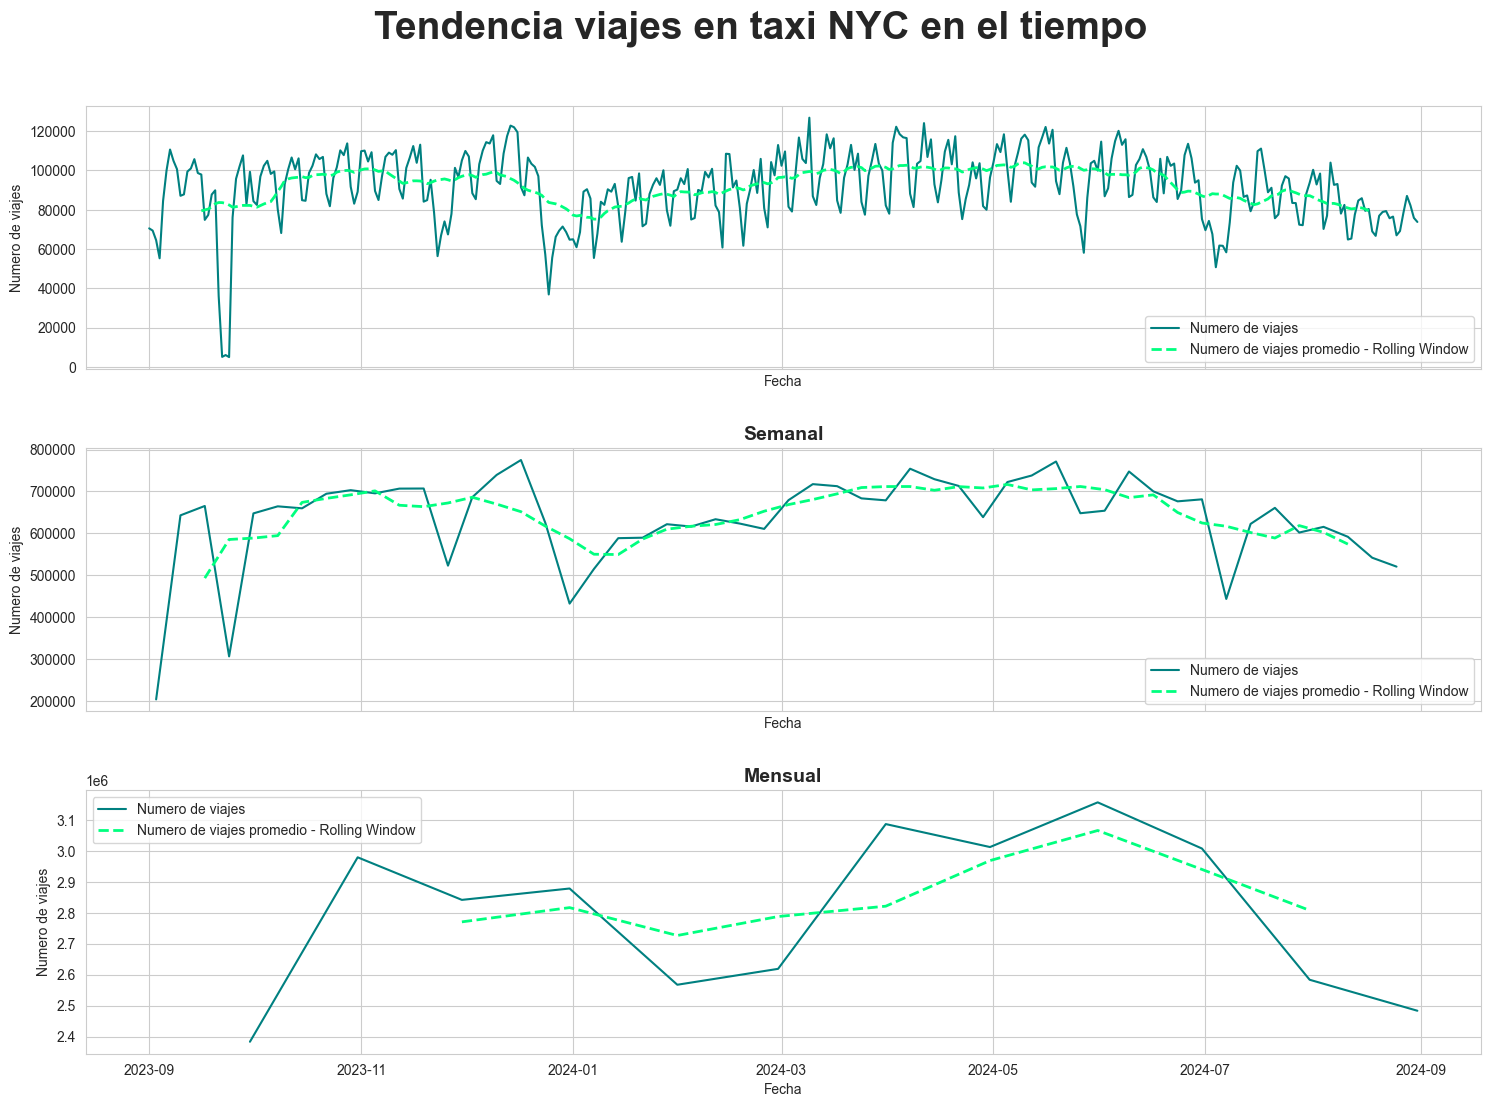

In [29]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (18,12), gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)
fig.suptitle("Tendencia viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)


ventana = (30)
diario_promedio_tendencia = diario.n_trips.rolling(window=ventana, center = True).mean()
ax[0].plot(diario.index, diario.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(diario_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Numero de viajes')
ax[1].set_title('Diario',fontsize=14, fontweight='bold')
ax[0].legend()

ventana = (5)
semanal_promedio_tendencia = semanal.n_trips.rolling(window=ventana, center = True).mean()
ax[1].plot(semanal.index, semanal.n_trips, label = 'Numero de viajes', color='teal')
ax[1].plot(semanal_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Numero de viajes')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')
ax[1].legend()

ventana = (4)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
ax[2].plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
ax[2].plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Numero de viajes')
ax[2].set_title('Mensual',fontsize=14, fontweight='bold')
ax[2].legend()


plt.show()

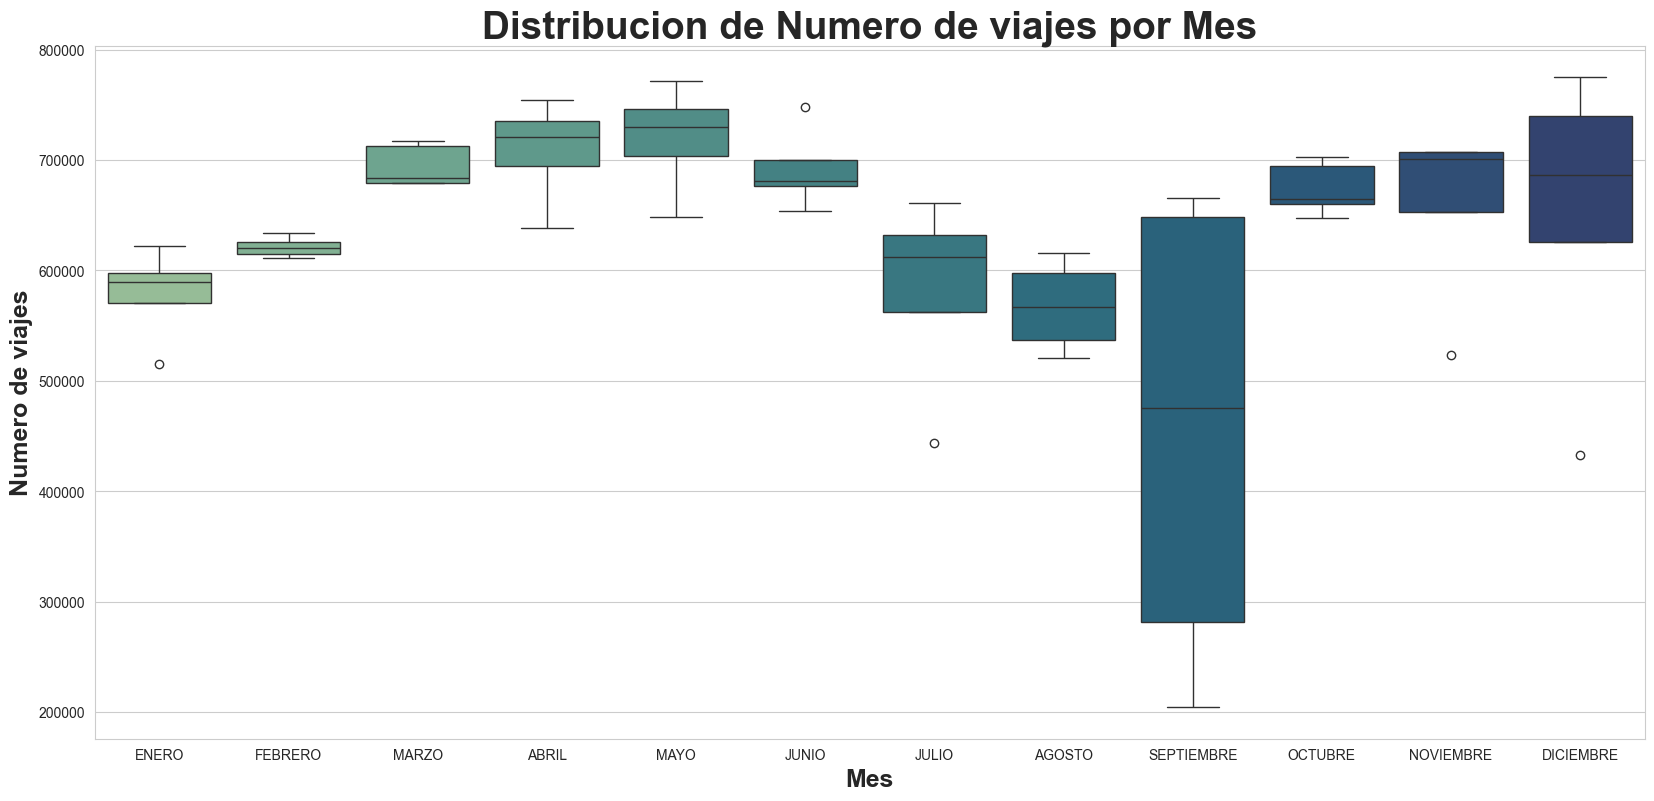

In [30]:
plt.figure(figsize = (20,9))
sns.boxplot(data=semanal,x=semanal.index.month,y= semanal.n_trips, palette='crest')
plt.title('Distribucion de Numero de viajes por Mes',fontsize = 28,fontweight='bold')
plt.xlabel('Mes',fontsize = 18,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 18,fontweight='bold')
plt.xticks(ticks=range(0,12), labels=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'])
plt.show()

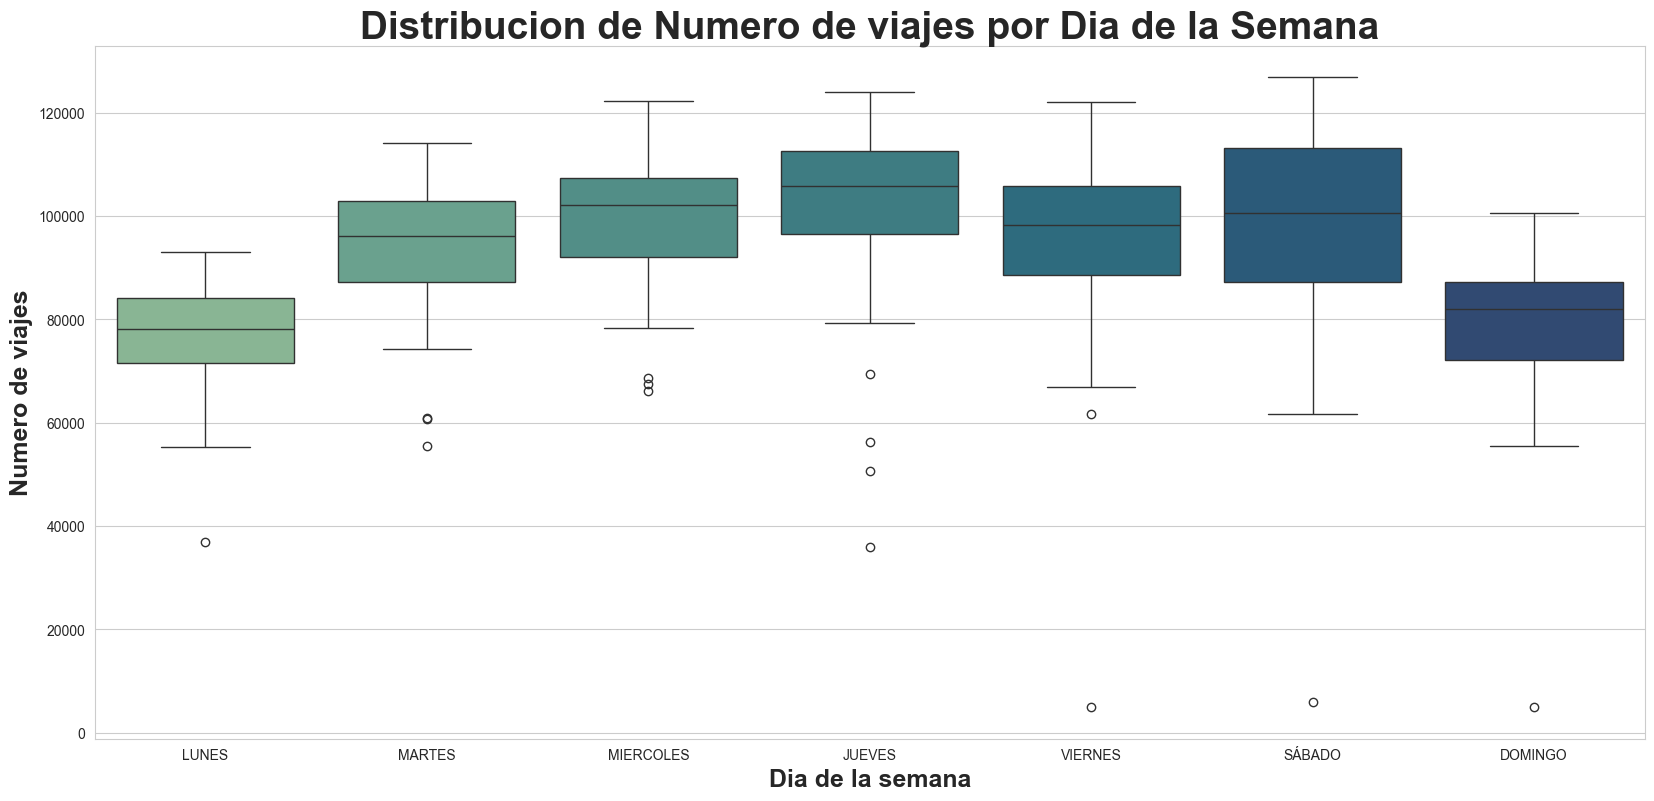

In [31]:
plt.figure(figsize = (20,9))
sns.boxplot(data=diario,x=diario.index.weekday,y= diario.n_trips, palette='crest')
plt.title('Distribucion de Numero de viajes por Dia de la Semana',fontsize = 28,fontweight='bold')
plt.xlabel('Dia de la semana',fontsize = 18,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 18,fontweight='bold')
plt.xticks(ticks=range(0,7), labels=['LUNES','MARTES','MIERCOLES','JUEVES','VIERNES','SÁBADO','DOMINGO'])
plt.show()

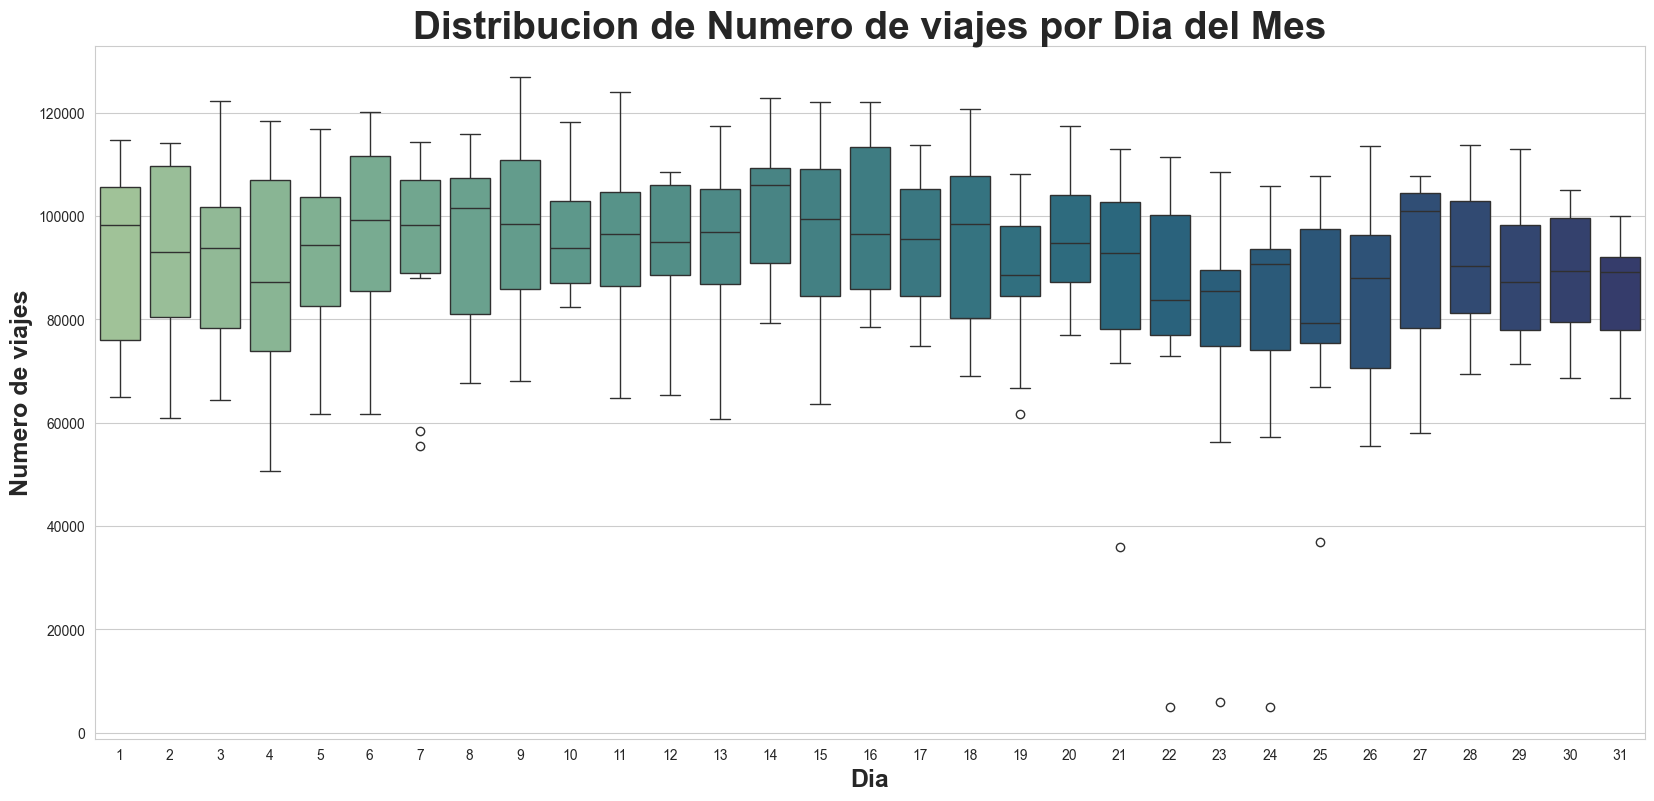

In [32]:
plt.figure(figsize = (20,9))
sns.boxplot(data=diario,x=diario.index.day,y= diario.n_trips, palette='crest')
plt.title('Distribucion de Numero de viajes por Dia del Mes',fontsize = 28,fontweight='bold')
plt.xlabel('Dia',fontsize = 18,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 18,fontweight='bold')
plt.show()

In [37]:
result_d = seasonal_decompose(diario.n_trips, model='additive')

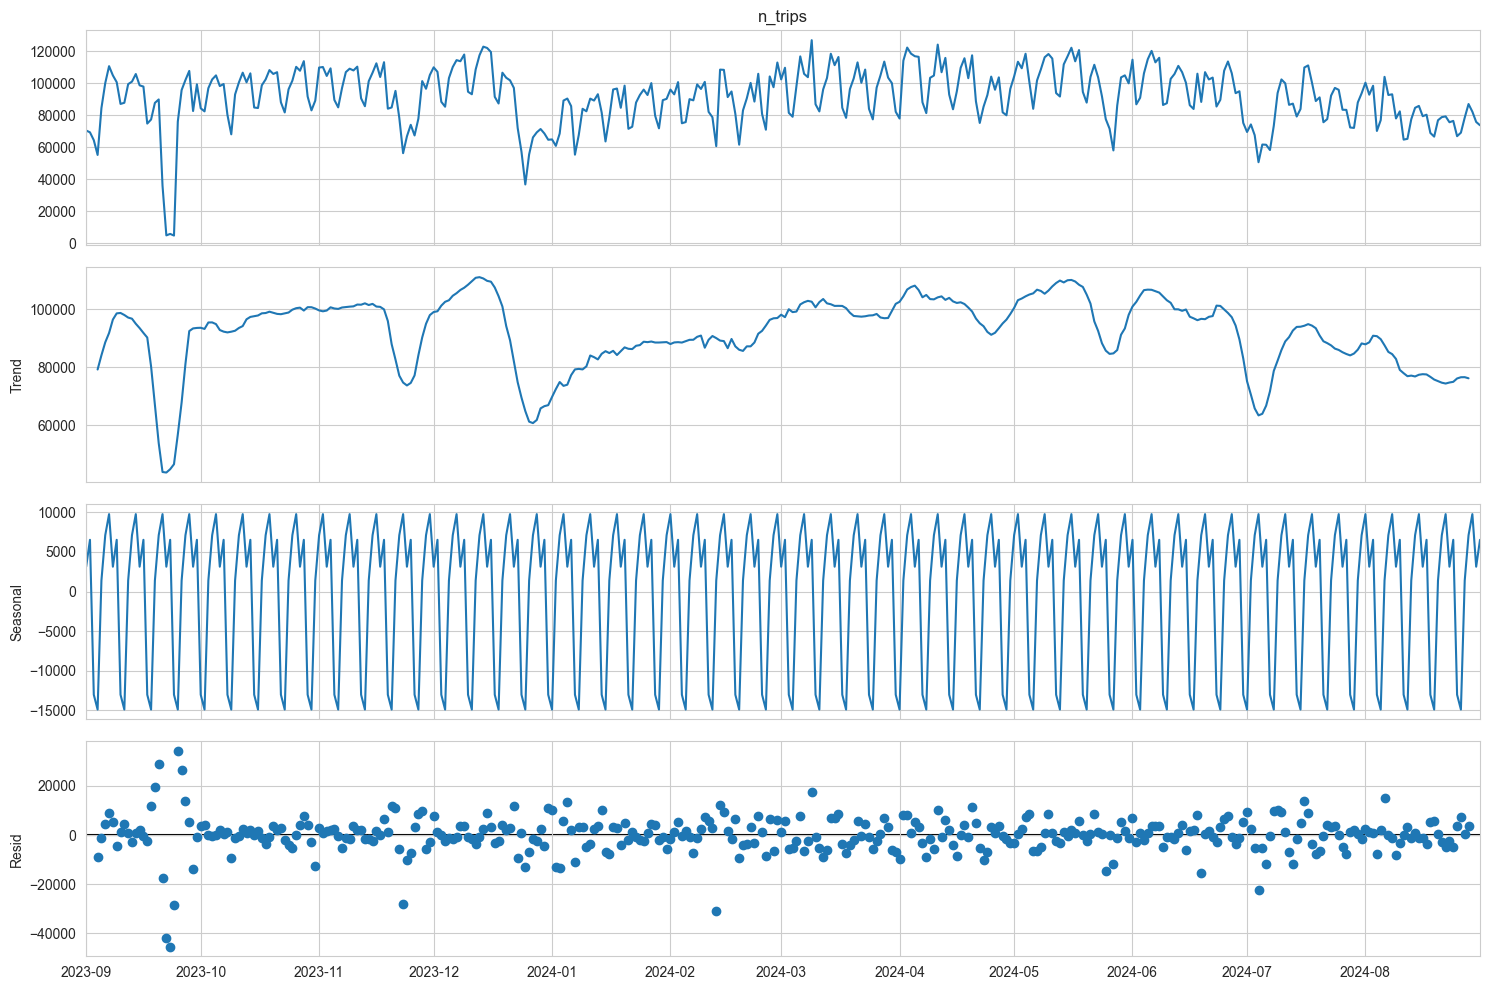

In [41]:
matplotlib.rcParams['figure.figsize'] = [15,10]
result_d.plot()
plt.show()


## Estacionariedad

In [46]:
#H0: No es estacionaria
#H1: Es estacionaria
def adfuller_test(trips):
    result = adfuller(trips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('Es estacionaria.')
    else:
        print('No es estacionaria.')

In [47]:
adfuller_test(diario.n_trips)

ADF Test Statistic : -3.1934408543047126
p-value : 0.02036750147355144
#Lags Used : 16
Number of Observations Used : 349
Es estacionaria.


In [48]:
adfuller_test(semanal.n_trips)

ADF Test Statistic : -6.7961034230823
p-value : 2.2988731172856682e-09
#Lags Used : 0
Number of Observations Used : 51
Es estacionaria.


In [49]:
adfuller_test(mensual.n_trips)

ADF Test Statistic : -1.5928645466318694
p-value : 0.48717689601261727
#Lags Used : 3
Number of Observations Used : 8
No es estacionaria.


## Regresion Lineal

In [53]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)

In [54]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)

In [55]:
semanal.head()

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros
pickup_datetime,,,,,,
2023-09-03,292416,404505.92,4131417.40,2.397677e+06,204372,738766
2023-09-10,846917,1183730.94,13663815.06,8.479715e+06,643151,738773
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479,738780
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,306965,738787
2023-10-01,840174,1177465.37,13800304.01,8.531493e+06,647820,738794


In [56]:
diario.head()

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros
pickup_datetime,,,,,,
2023-09-01,95962,133841.99,1450667.38,8.506362e+05,70507,738764
2023-09-02,102172,140082.69,1392046.81,8.091243e+05,69369,738765
2023-09-03,94248,130534.48,1288262.71,7.376572e+05,64477,738766
2023-09-04,77974,108746.75,1051975.42,5.583484e+05,55272,738767
2023-09-05,107088,152369.55,1746995.00,1.040973e+06,84509,738768


In [59]:
reg_lineal_d = LinearRegression() #Instanciamos el modelo

reg_lineal_d.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura) 

LinearRegression()

In [60]:
reg_lineal_s = LinearRegression() #Instanciamos el modelo

reg_lineal_s.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura) 

LinearRegression()

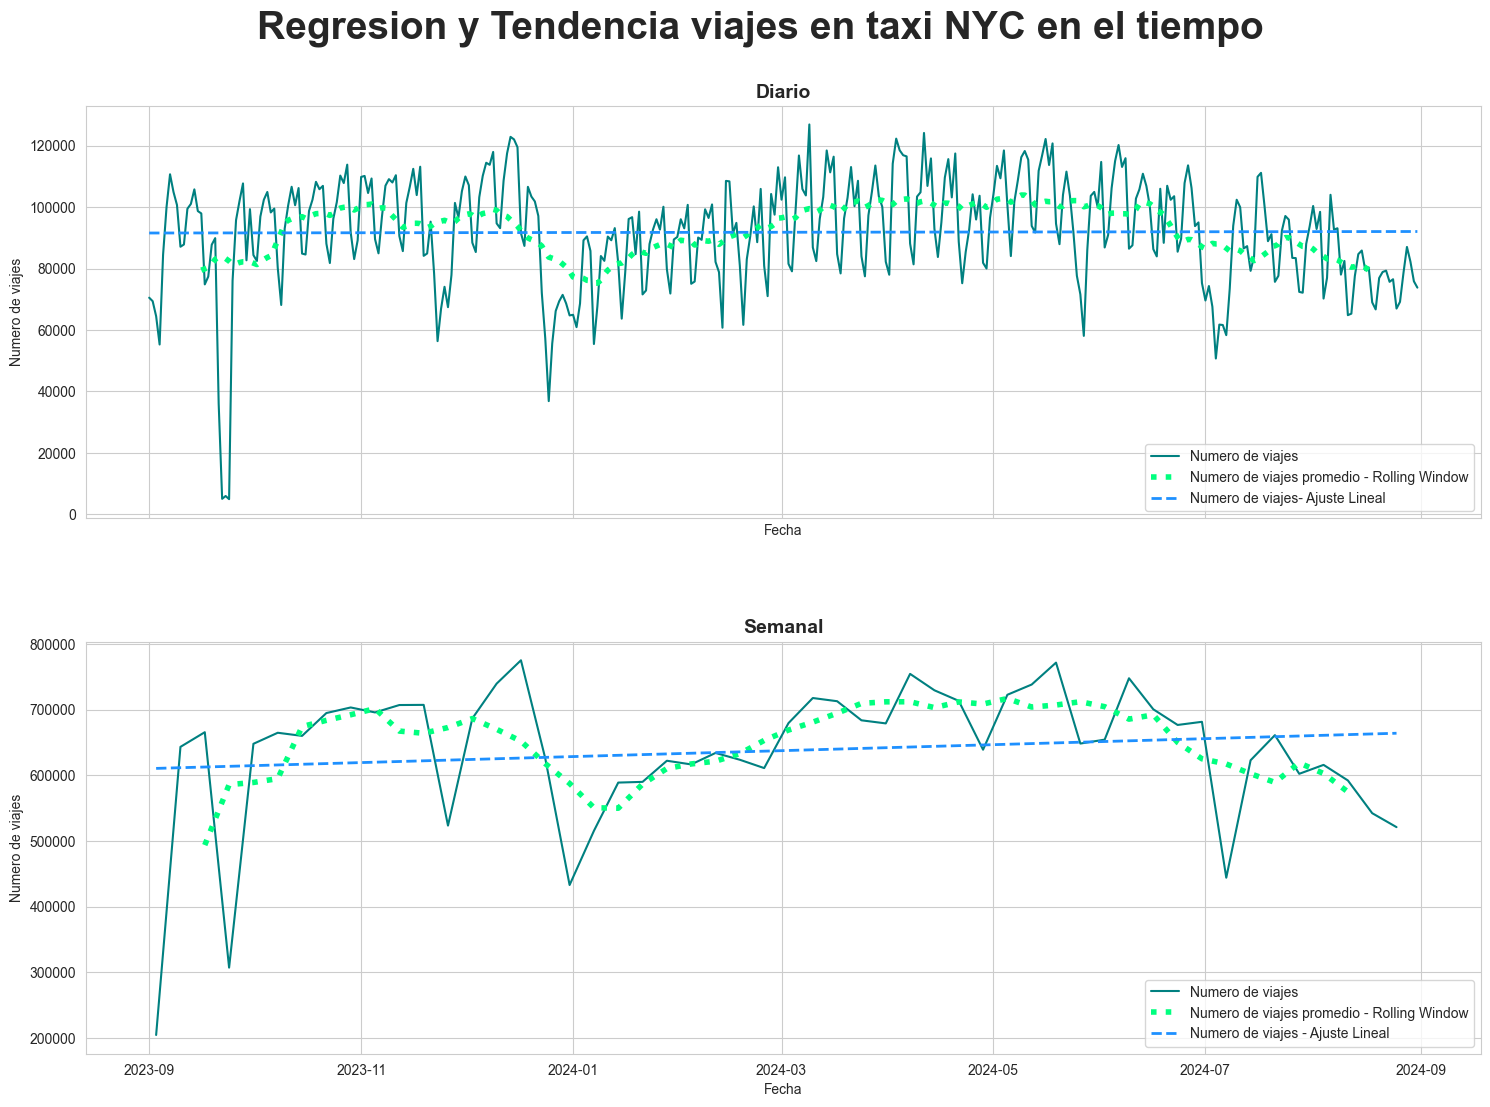

In [65]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,1, figsize = (18,12), gridspec_kw={'height_ratios': [1, 1]}, sharex=True)
fig.suptitle("Regresion y Tendencia viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ax[0].plot(diario.index, diario.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(diario_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[0].plot(diario.index, reg_lineal_d.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes- Ajuste Lineal', color='dodgerblue')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Numero de viajes')
ax[0].set_title('Diario',fontsize=14, fontweight='bold')
ax[0].legend()

ax[1].plot(semanal.index, semanal.n_trips, label = 'Numero de viajes', color='teal')
ax[1].plot(semanal_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[1].plot(semanal.index, reg_lineal_s.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes - Ajuste Lineal', color='dodgerblue')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Numero de viajes')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].legend()

plt.show()